In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score


In [46]:
df = pd.read_csv("train.csv")

In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
Fare               0
Embarked           2
Title              0
family_member      0
dtype: int64

In [48]:
df.drop(columns=["PassengerId","Ticket","Cabin"],inplace=True)

In [49]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
489,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,15.9000,S
130,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,7.8958,C
613,0,3,"Horgan, Mr. John",male,NaN,0,0,7.7500,Q
539,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,49.5000,C
232,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S


In [58]:
df["Title"] = df["Name"].str.extract(r",\s*([^\.]*)\.", expand=False)

In [66]:
df.groupby("Title")["Survived"].mean()

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Rare      0.444444
Name: Survived, dtype: float64

In [60]:
number_title=df["Title"].value_counts()>10
non_rare_title = number_title[number_title].index
non_rare_title

Index(['Mr', 'Miss', 'Mrs', 'Master'], dtype='object', name='Title')

In [61]:
df.loc[~df["Title"].isin(non_rare_title),"Title"]="Rare"


In [62]:
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [64]:
df=df.drop(columns=["Name"])

In [104]:
df["family_member"] = df["SibSp"]+df["Parch"]
df.drop(columns=["Parch","SibSp"],inplace=True)

In [105]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,family_member
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Rare,0
887,1,1,female,19.0,30.0000,S,Miss,0
888,0,3,female,NaN,23.4500,S,Miss,3
889,1,1,male,26.0,30.0000,C,Mr,0


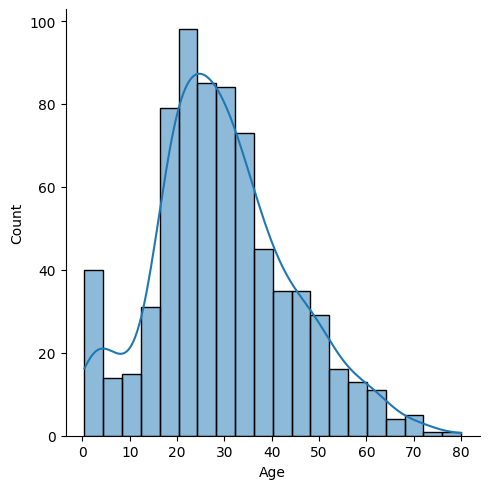

In [68]:
sns.displot(data=df,x="Age",kde=True)

In [86]:
df["Fare"].skew()

np.float64(4.787316519674893)

In [107]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [281]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2,random_state=42)

In [282]:
x_train

,Pclass,Sex,Age,Fare,Embarked,Title,family_member
331,1,male,45.5,28.5000,S,Mr,0
733,2,male,23.0,13.0000,S,Mr,0
382,3,male,32.0,7.9250,S,Mr,0
704,3,male,26.0,7.8542,S,Mr,1
813,3,female,6.0,31.2750,S,Miss,6
...,...,...,...,...,...,...,...
106,3,female,21.0,7.6500,S,Miss,0
270,1,male,NaN,31.0000,S,Mr,0
860,3,male,41.0,14.1083,S,Mr,2
435,1,female,14.0,120.0000,S,Miss,3


In [283]:
trf1 = FunctionTransformer(func=np.log1p)
x_train_fare = trf1.fit_transform(x_train["Fare"])
x_test_fare = trf1.transform(x_test["Fare"])
x_train_fare

331    3.384390
733    2.639057
382    2.188856
704    2.180892
813    3.474293
         ...   
106    2.157559
270    3.465736
860    2.715244
435    4.795791
102    4.360388
Name: Fare, Length: 712, dtype: float64

In [284]:
impute_age = SimpleImputer(strategy='mean',add_indicator=True)
x_train_age = impute_age.fit_transform(x_train[["Age"]])
x_test_age = impute_age.transform(x_test[["Age"]])
x_train_age

array([[45.5,  0. ],
       [23. ,  0. ],
       [32. ,  0. ],
       ...,
       [41. ,  0. ],
       [14. ,  0. ],
       [21. ,  0. ]], shape=(712, 2))

In [285]:
imputer_embarked = SimpleImputer(strategy="most_frequent")
x_train_embarked = imputer_embarked.fit_transform(x_train[["Embarked"]])
x_test_embarked = imputer_embarked.transform(x_test[["Embarked"]])

In [286]:
encoder_embarked = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
encoder_sex = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
encoder_title = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

x_train_embarked = encoder_embarked.fit_transform(x_train_embarked)
x_train_sex = encoder_sex.fit_transform(x_train[["Sex"]])
x_train_title = encoder_title.fit_transform(x_train[["Title"]])

# Similarly transform on test data
x_test_embarked = encoder_embarked.transform(x_test_embarked)
x_test_sex = encoder_sex.transform(x_test[["Sex"]])
x_test_title = encoder_title.transform(x_test[["Title"]])

In [287]:
x_train_rem = x_train[["Pclass", "family_member"]]
x_test_rem = x_test[["Pclass", "family_member"]]


In [291]:
x_train_trf = np.hstack([
    x_train_age,
    x_train_embarked,
    x_train_sex,
    x_train_title,
    x_train_rem.values,
    x_train_fare.values.reshape(-1, 1)
])



In [292]:
x_test_trf = np.hstack([
    x_test_age,
    x_test_embarked,
    x_test_sex,
    x_test_title,
    x_test_rem.values,
    x_test_fare.values.reshape(-1,1)    # if it's a DataFrame, get the NumPy array
])

In [293]:
lr=LogisticRegression()
lr.fit(x_train_trf,y_train)

/Users/keshavmacbook/Projects/AI-ML/200days100model/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [294]:
y_pred=lr.predict(x_test_trf)

In [295]:
accuracy_score(y_pred,y_test)

0.8100558659217877

In [226]:
test_df = pd.read_csv("test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [239]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [238]:
# Impute missing Fare in test set with median or mean (your choice)
test_df["Fare"].fillna(x_test["Fare"].mean(), inplace=True)


/var/folders/x4/dcd672b95h70g_8b6vm4lcp40000gn/T/ipykernel_48531/802196451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Fare"].fillna(x_test["Fare"].mean(), inplace=True)


In [ ]:
test_df["Title"] = test_df["Name"].str.extract(r",\s*([^\.]*)\.", expand=False)

In [244]:
test_df["family_member"] = test_df["SibSp"]+test_df["Parch"]


In [ ]:
pid=test_df["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [248]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_member
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,0


In [ ]:
test_df.drop(columns=["PassengerId","Name","SibSp", "Parch","Ticket","Cabin"],inplace=True)
test_df

,Pclass,Sex,Age,Fare,Embarked,Title,family_member
0,3,male,34.5,7.8292,Q,Mr,0
1,3,female,47.0,7.0000,S,Mrs,1
2,2,male,62.0,9.6875,Q,Mr,0
3,3,male,27.0,8.6625,S,Mr,0
4,3,female,22.0,12.2875,S,Mrs,2
...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,Mr,0
414,1,female,39.0,108.9000,C,Dona,0
415,3,male,38.5,7.2500,S,Mr,0
416,3,male,NaN,8.0500,S,Mr,0


In [257]:
test_df_fare = trf1.transform(test_df["Fare"])
test_df_fare

0      2.178064
1      2.079442
2      2.369075
3      2.268252
4      2.586824
         ...   
413    2.202765
414    4.699571
415    2.110213
416    2.202765
417    3.150952
Name: Fare, Length: 418, dtype: float64

In [258]:
test_df_age = impute_age.transform(test_df[["Age"]])
test_df_age

array([[34.5       ,  0.        ],
       [47.        ,  0.        ],
       [62.        ,  0.        ],
       [27.        ,  0.        ],
       [22.        ,  0.        ],
       [14.        ,  0.        ],
       [30.        ,  0.        ],
       [26.        ,  0.        ],
       [18.        ,  0.        ],
       [21.        ,  0.        ],
       [29.49884615,  1.        ],
       [46.        ,  0.        ],
       [23.        ,  0.        ],
       [63.        ,  0.        ],
       [47.        ,  0.        ],
       [24.        ,  0.        ],
       [35.        ,  0.        ],
       [21.        ,  0.        ],
       [27.        ,  0.        ],
       [45.        ,  0.        ],
       [55.        ,  0.        ],
       [ 9.        ,  0.        ],
       [29.49884615,  1.        ],
       [21.        ,  0.        ],
       [48.        ,  0.        ],
       [50.        ,  0.        ],
       [22.        ,  0.        ],
       [22.5       ,  0.        ],
       [41.        ,

In [269]:
test_df_embarked = imputer_embarked.transform(test_df[["Embarked"]])
test_df_embarked

array([['Q'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
      

In [270]:
test_df_embarked = encoder_embarked.transform(test_df_embarked)
test_df_sex = encoder_sex.transform(test_df[["Sex"]])
test_df_title = encoder_title.transform(test_df[["Title"]])

/Users/keshavmacbook/Projects/AI-ML/200days100model/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [274]:
test_df_rem = test_df[["Pclass", "family_member"]]

In [296]:
test_df_trf = np.hstack([
    test_df_age,
    test_df_fare.values.reshape(-1,1),  # Add Fare here
    test_df_embarked,
    test_df_sex,
    test_df_title,
    test_df_rem.values
])


In [297]:
final_ans=lr.predict(test_df_trf)

In [299]:
submission = pd.DataFrame({
    "PassengerId": pid,
    "Survived": final_ans
})

submission.to_csv("submission.csv", index=False)


In [300]:
y_test_result=pd.read_csv("gender_submission.csv")

In [304]:
y_test_result
y_test_final=y_test_result["Survived"]
y_test_final=np.array(y_test_final)

In [305]:
accuracy_score(final_ans,y_test_final)

0.05980861244019139